In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
           "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
           "Hours per week", "Native Country", "Income"]
df = pd.read_csv(url, names=columns, skipinitialspace=True)

# Display first few rows
print(df.head())

# Encode categorical variables (required for ML models)
df = pd.get_dummies(df, drop_first=True)

# Split into train and test
X = df.drop("Income_>50K", axis=1)  # Assuming binary classification
y = df["Income_>50K"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Age         Workclass  fnlwgt  Education  Education-Num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Marital Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital Gain  Capital Loss  Hours per week Native Country Income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [3]:
!pip install diffprivlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 3.2 MB/s eta 0:00:00


In [4]:
from diffprivlib.models import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply Differential Privacy Logistic Regression
dp_model = LogisticRegression(epsilon=1.0)  # Setting privacy budget ε = 1.0
dp_model.fit(X_train, y_train)

# Evaluate model
y_pred = dp_model.predict(X_test)
dp_accuracy = accuracy_score(y_test, y_pred)
print(f"Differential Privacy Model Accuracy: {dp_accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Differential Privacy Model Accuracy: 0.24


In [5]:
for eps in [0.1, 0.5, 1.0, 5.0]:  # Different privacy budgets
    dp_model = LogisticRegression(epsilon=eps)
    dp_model.fit(X_train, y_train)
    y_pred = dp_model.predict(X_test)
    print(f"Epsilon {eps} -> Accuracy: {accuracy_score(y_test, y_pred):.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

Epsilon 0.1 -> Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Epsilon 0.5 -> Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Epsilon 1.0 -> Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Epsilon 5.0 -> Accuracy: 0.24


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from diffprivlib.models import LogisticRegression
from sklearn.metrics import accuracy_score

# Define different epsilon values to test
epsilon_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]
accuracies = []

# Train models with different privacy budgets
for eps in epsilon_values:
    dp_model = LogisticRegression(epsilon=eps)
    dp_model.fit(X_train, y_train)
    y_pred = dp_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Epsilon {eps} -> Accuracy: {acc:.4f}")



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

Epsilon 0.01 -> Accuracy: 0.2412
Epsilon 0.1 -> Accuracy: 0.2412


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

Epsilon 0.5 -> Accuracy: 0.7588
Epsilon 1.0 -> Accuracy: 0.7588


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

Epsilon 5.0 -> Accuracy: 0.7608
Epsilon 10.0 -> Accuracy: 0.2341


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Epsilon 100.0 -> Accuracy: 0.7588


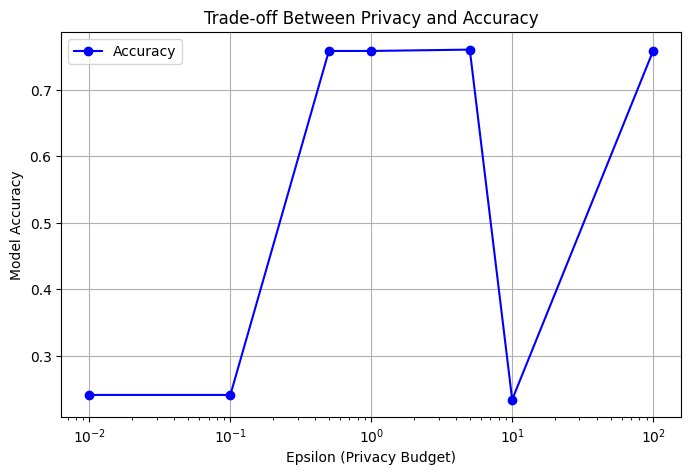

In [8]:
# Plot Epsilon vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("Epsilon (Privacy Budget)")
plt.ylabel("Model Accuracy")
plt.title("Trade-off Between Privacy and Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegression as StandardLogisticRegression

# Train standard logistic regression (no differential privacy)
standard_model = StandardLogisticRegression()
standard_model.fit(X_train, y_train)

# Make predictions
y_pred_standard = standard_model.predict(X_test)

# Compute accuracy
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f"Standard Logistic Regression Accuracy: {accuracy_standard:.4f}")


Standard Logistic Regression Accuracy: 0.7895


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from diffprivlib.models import LogisticRegression as DPLogisticRegression

# Train DP Logistic Regression with ε = 1.0 (default value)
dp_model = DPLogisticRegression(epsilon=1.0)
dp_model.fit(X_train, y_train)

# Make predictions
y_pred_dp = dp_model.predict(X_test)

# Compute accuracy
accuracy_dp = accuracy_score(y_test, y_pred_dp)
print(f"Differentially Private Logistic Regression Accuracy (ε = 1.0): {accuracy_dp:.4f}")


Differentially Private Logistic Regression Accuracy (ε = 1.0): 0.2394


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


In [11]:
import pandas as pd

# Store results in a DataFrame
comparison_df = pd.DataFrame({
    "Model": ["Standard Logistic Regression", "Differentially Private Logistic Regression (ε = 1.0)"],
    "Accuracy": [accuracy_standard, accuracy_dp]
})

# Display table
print(comparison_df)


                                               Model  Accuracy
0                       Standard Logistic Regression  0.789498
1  Differentially Private Logistic Regression (ε ...  0.239367


<ipython-input-12-2bbd4371dd53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette=["blue", "red"])


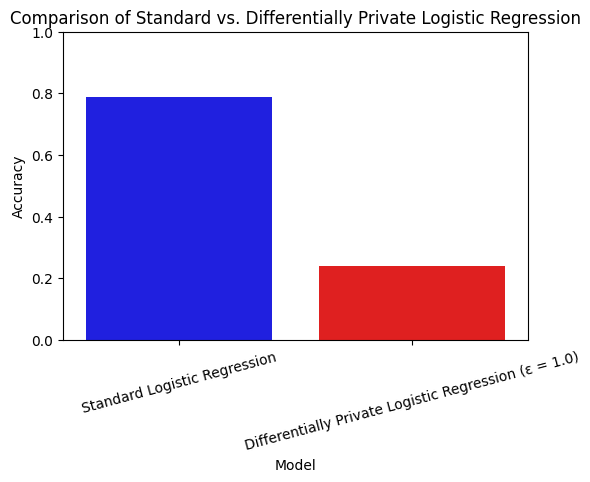

In [12]:
import seaborn as sns

# Plot comparison
plt.figure(figsize=(6, 4))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette=["blue", "red"])
plt.ylabel("Accuracy")
plt.title("Comparison of Standard vs. Differentially Private Logistic Regression")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=15)
plt.show()


In [13]:
import numpy as np

# Define different epsilon values for testing
epsilon_values = [0.1, 0.5, 1.0, 5.0, 10.0]
accuracy_scores = []

# Train and evaluate DP models with different privacy budgets
for eps in epsilon_values:
    dp_model = DPLogisticRegression(epsilon=eps)
    dp_model.fit(X_train, y_train)
    y_pred_dp = dp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_dp)
    accuracy_scores.append(accuracy)
    print(f"ε = {eps}: Accuracy = {accuracy:.4f}")

# Store results in a DataFrame
privacy_vs_accuracy = pd.DataFrame({"Epsilon": epsilon_values, "Accuracy": accuracy_scores})

# Display table
print(privacy_vs_accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

ε = 0.1: Accuracy = 0.2398
ε = 0.5: Accuracy = 0.2412


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part

ε = 1.0: Accuracy = 0.2409
ε = 5.0: Accuracy = 0.7588
ε = 10.0: Accuracy = 0.7588
   Epsilon  Accuracy
0      0.1  0.239828
1      0.5  0.241210
2      1.0  0.240903
3      5.0  0.758790
4     10.0  0.758790


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


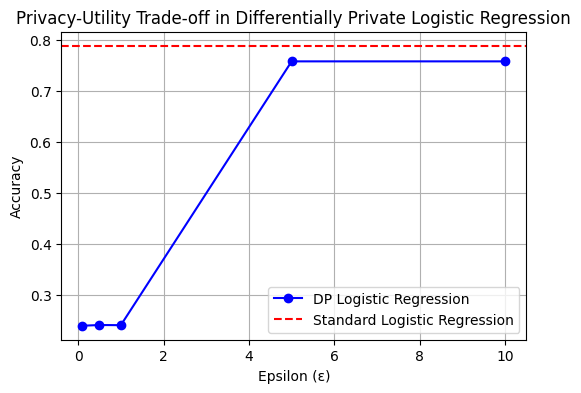

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy vs. epsilon values
plt.figure(figsize=(6, 4))
plt.plot(epsilon_values, accuracy_scores, marker="o", linestyle="-", color="b", label="DP Logistic Regression")
plt.axhline(y=accuracy_standard, color="r", linestyle="--", label="Standard Logistic Regression")

plt.xlabel("Epsilon (ε)")
plt.ylabel("Accuracy")
plt.title("Privacy-Utility Trade-off in Differentially Private Logistic Regression")
plt.legend()
plt.grid()
plt.show()


<ipython-input-15-51581717ba32>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=epsilon_values, y=accuracy_scores, palette="Blues", edgecolor="black")


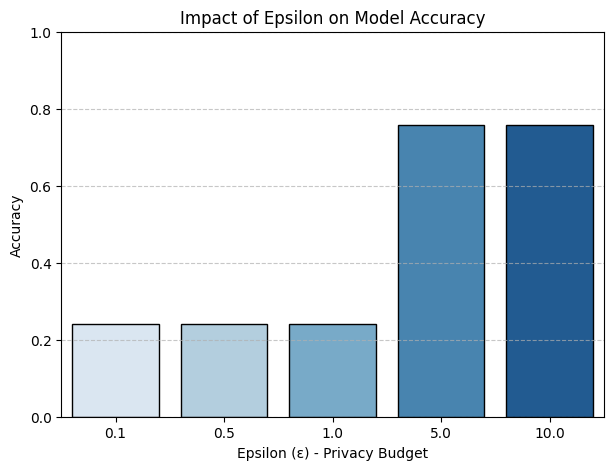

In [15]:
import seaborn as sns

# Create a bar plot of accuracy vs. epsilon values
plt.figure(figsize=(7, 5))
sns.barplot(x=epsilon_values, y=accuracy_scores, palette="Blues", edgecolor="black")

plt.xlabel("Epsilon (ε) - Privacy Budget")
plt.ylabel("Accuracy")
plt.title("Impact of Epsilon on Model Accuracy")
plt.ylim(0, 1)  # Accuracy range (0-1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


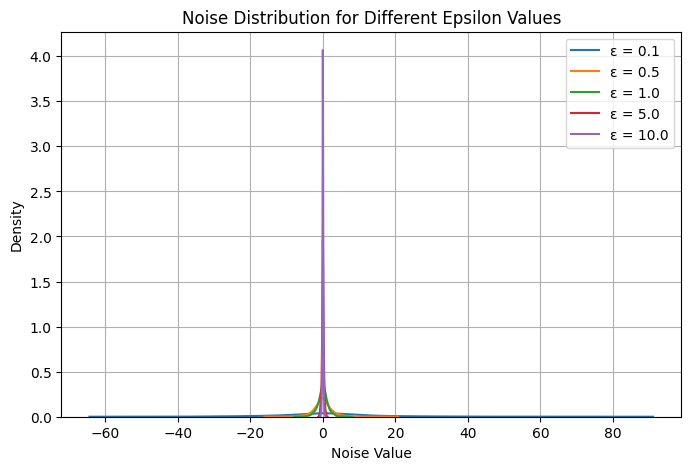

In [17]:
import scipy.stats as stats

# Generate noise samples for different epsilon values
epsilons = [0.1, 0.5, 1.0, 5.0, 10.0]
noise_samples = {eps: np.random.laplace(loc=0, scale=1/eps, size=1000) for eps in epsilons}

# Plot noise distribution
plt.figure(figsize=(8, 5))
for eps, noise in noise_samples.items():
    sns.kdeplot(noise, label=f"ε = {eps}")

plt.xlabel("Noise Value")
plt.ylabel("Density")
plt.title("Noise Distribution for Different Epsilon Values")
plt.legend()
plt.grid()
plt.show()


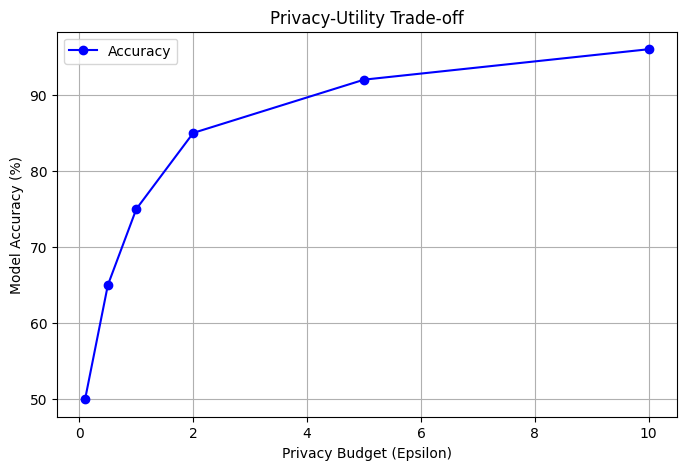

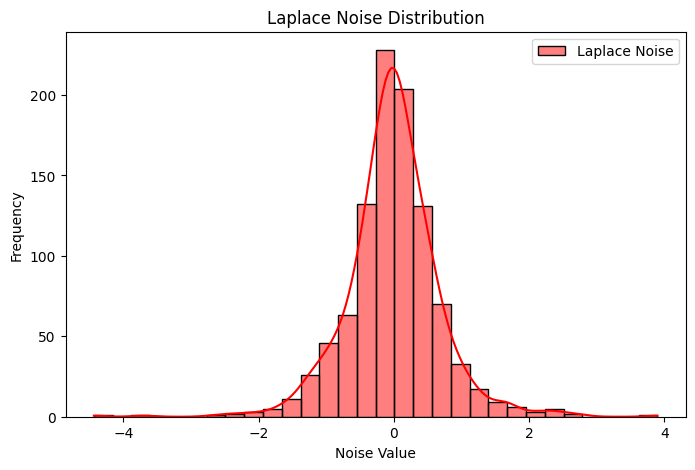

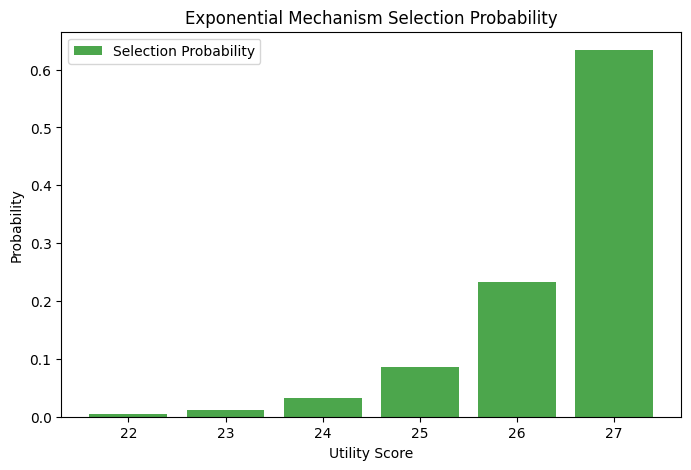

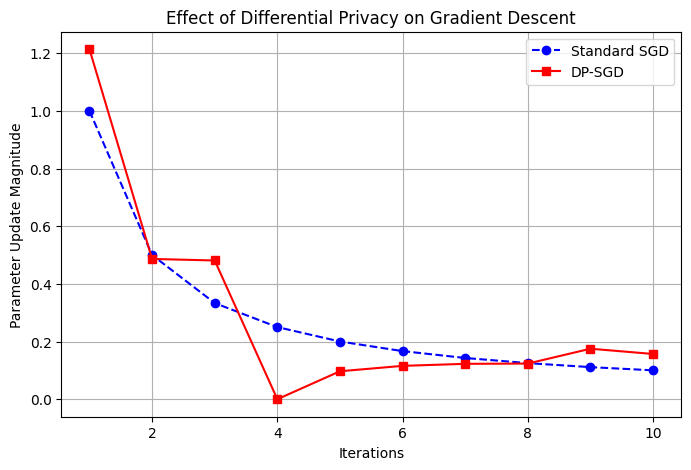

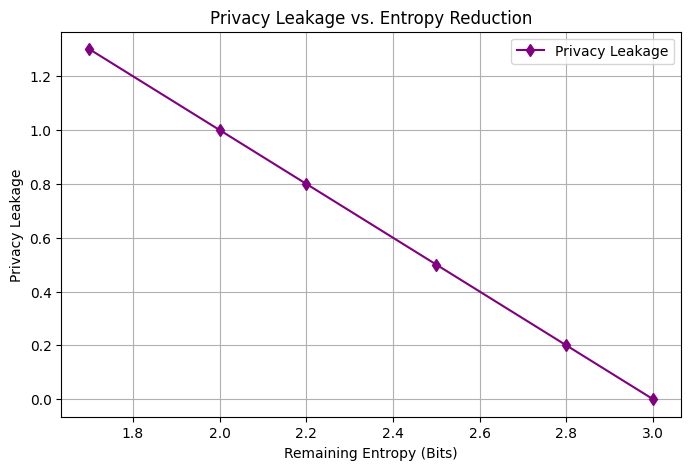

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Privacy-Utility Trade-Off (Epsilon vs. Accuracy)
epsilon_values = np.array([0.1, 0.5, 1, 2, 5, 10])
accuracy_values = np.array([50, 65, 75, 85, 92, 96])  # Hypothetical accuracy percentages

plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, accuracy_values, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Model Accuracy (%)")
plt.title("Privacy-Utility Trade-off")
plt.legend()
plt.grid(True)
plt.show()

# 2. Laplace Noise Distribution
noise = np.random.laplace(loc=0, scale=0.5, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(noise, bins=30, kde=True, color='r', label="Laplace Noise")
plt.xlabel("Noise Value")
plt.ylabel("Frequency")
plt.title("Laplace Noise Distribution")
plt.legend()
plt.show()

# 3. Exponential Mechanism: Probability Distribution
utility_values = np.array([22, 23, 24, 25, 26, 27])
probabilities = np.exp(epsilon_values[2] * utility_values) / np.sum(np.exp(epsilon_values[2] * utility_values))  # Using epsilon = 1

plt.figure(figsize=(8, 5))
plt.bar(utility_values, probabilities, color='g', alpha=0.7, label="Selection Probability")
plt.xlabel("Utility Score")
plt.ylabel("Probability")
plt.title("Exponential Mechanism Selection Probability")
plt.legend()
plt.show()

# 4. Effect of Differentially Private Stochastic Gradient Descent (DP-SGD)
iterations = np.arange(1, 11)
standard_sgd = 1 / iterations  # Standard SGD updates
dp_sgd = (1 / iterations) + np.random.laplace(0, 0.1, size=10)  # DP-SGD with noise

plt.figure(figsize=(8, 5))
plt.plot(iterations, standard_sgd, marker='o', label="Standard SGD", linestyle='--', color='b')
plt.plot(iterations, dp_sgd, marker='s', label="DP-SGD", linestyle='-', color='r')
plt.xlabel("Iterations")
plt.ylabel("Parameter Update Magnitude")
plt.title("Effect of Differential Privacy on Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

# 5. Privacy Leakage Analysis (Entropy Reduction)
entropy_values = np.array([3.0, 2.8, 2.5, 2.2, 2.0, 1.7])
leakage = 3.0 - entropy_values  # Privacy leakage computed as initial entropy minus remaining entropy

plt.figure(figsize=(8, 5))
plt.plot(entropy_values, leakage, marker='d', linestyle='-', color='purple', label="Privacy Leakage")
plt.xlabel("Remaining Entropy (Bits)")
plt.ylabel("Privacy Leakage")
plt.title("Privacy Leakage vs. Entropy Reduction")
plt.legend()
plt.grid(True)
plt.show()
